## Plot effects of inserts on mRNA levels



### Load libraries and define analysis-specific parameters

In [1]:
library(Biostrings)
library(tidyverse)
library(rasilabRtemplates)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading required package: GenomeInfoDb


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:



### Read in barcode counts

In [2]:
barcode_counts <- read_tsv("../tables/sample_insert_barcode_counts.tsv.gz") %>% print 

timecourse_counts <- barcode_counts %>%
  # Select only timecourse samples
  filter(!str_detect(sample_name, "rna")) %>%
  # Remove "stall4control4_" from sample names
  mutate(sample_name = str_remove(sample_name, "stall4control4_")) %>%
  # Create a time column based on sample_name 
  mutate(time = as.numeric(str_extract(sample_name, "(?<=.).+"))) 

timecourse_counts  

Rows: 27840 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): sample_name, cellline
dbl (5): pool, insert_num, barcode_num, barcode_count, linkage_count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 27,840 × 7
   sample_name cellline  pool insert_num barcode_num barcode_count linkage_count
   <chr>       <chr>    <dbl>      <dbl>       <dbl>         <dbl>         <dbl>
 1 stall4cont… K562         6          5       12338          2551             1
 2 stall4cont… HeLa         5          4        7889          1779           303
 3 stall4cont… HeLa         5          5        7888          1628           431
 4 stall4cont… HeLa         5          2        7909          1107           223
 5 stall4cont… K562         6          3       10487          1041           333
 6 stall4cont… HeLa         5          3        7899          1000           254
 7 stall4cont… HCT116       4          7        7845           970             1
 8 stall4cont… HeLa         5          5        8016           941           151
 9 stall4cont… K562         6          5       11819           938             2
10 stall4cont… HCT116       4          5        7208           934             2
# … w

sample_name,cellline,pool,insert_num,barcode_num,barcode_count,linkage_count,time
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
t0,HeLa,5,3,10186,2946,1,0
t0,NA,2,5,3369,2260,1,0
t0,HEK293T,3,7,3617,1520,279,0
t0,HEK293T,3,7,3630,1346,243,0
t0,HEK293T,3,7,3640,1343,228,0
t0,HEK293T,3,7,3662,1101,207,0
t0,HEK293T,3,7,3626,1005,253,0
t0,HEK293T,3,7,3686,997,184,0
t0,HEK293T,3,7,3818,976,133,0


### Read insert annotations

In [4]:
insert_annotations <- read_tsv("../../pool4_linkage/annotations/insert_annotations/stall4control4_linkage.tsv") %>% 
  print()

Rows: 8 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): insert_name, insert_seq, insert_type
dbl (4): group, insert_num, pair, frame

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 8 × 7
  group insert_name insert_seq                insert_type insert_num  pair frame
  <dbl> <chr>       <chr>                     <chr>            <dbl> <dbl> <dbl>
1     1 SVKF4       AGCGTCAAATTCTCCGTTAAGTTT… stall                0     4    NA
2     1 SKVF4       AGCAAAGTCTTCTCCAAGGTTTTT… control              1     4    NA
3     1 VK8         GTCAAAGTCAAAGTCAAAGTCAAA… stall                2     2     0
4     1 QS8         CAAAGTCAAAGTCAAAGTCAAAGT… control              3     2     2
5     1 SF8         AGTTTCAGTTTCAGTTTCAGTTTC… stall                4     3     0
6     1 FQ8         TTTCAGTTTCAGTTTCAGTTTCAG… control              5     3     2
7     1 RH8         CGCCATCGCCATCGCCATCGCCAT… stall                6     1     0
8     1 PS8         CCATCGCCATCGCCATCGCCATCG… control              7     1     2


### Function for bootstrap mRNA levels

In [5]:

calc_lfc_bootstrap <- function(data, indices) {
  d <- data[indices,]
  log2(sum(d$barcode_count))
}

### Calculate normalized mRNA levels per insert

- Pool 3 is HEK293T sample 
- Pool 4 is HCT116 as a negative control that was not spiked in
- Pool 5 is HeLa as spike in (we normalize by this)

- Pick only barcodes that are present in all time points


In [6]:

lfc_data <- timecourse_counts %>% 
  group_by(barcode_num) %>% 
  mutate(n_timepoints = dplyr::n()) %>% 
  ungroup() %>% 
  filter(n_timepoints == 6) %>% 
  filter(pool == 3|5) %>%  
  group_by(sample_name, time) %>% 
  mutate(barcode_count = barcode_count * 1e4 / sum(barcode_count[pool == 5])) %>% 
  ungroup() %>% 
  filter(pool == 3) %>% 
  select(-pool, -linkage_count) %>% 
  group_by(sample_name, time, insert_num) %>% 
  nest() %>%
  mutate(boot = map(data, function(df) boot::boot(data=df, statistic=calc_lfc_bootstrap, R=5000))) %>%
  # this gives mean and std.error of bootstrap
  mutate(stat = map(boot, broom::tidy)) %>% 
  # this gives all the replicates
  mutate(lfc = map(boot, function(x) x$t)) %>% 
  select(-data, -boot) %>%
  unnest(stat) %>% 
  group_by(insert_num) %>%
  mutate(statistic = statistic - statistic[time == 0]) %>%
  ungroup() %>%
  left_join(insert_annotations, by = "insert_num") %>%
  print()

# A tibble: 42 × 13
   sample_name insert_num  time statistic     bias std.error lfc      group
   <chr>            <dbl> <dbl>     <dbl>    <dbl>     <dbl> <list>   <dbl>
 1 t0                   7   0       0     -0.00792    0.0943 <dbl[…]>     1
 2 t0                   5   0       0     -0.00135    0.0718 <dbl[…]>     1
 3 t0                   3   0       0     -0.00201    0.0798 <dbl[…]>     1
 4 t0                   4   0       0     -0.00637    0.142  <dbl[…]>     1
 5 t0                   6   0       0     -0.0130     0.202  <dbl[…]>     1
 6 t0                   2   0       0     -0.00182    0.0930 <dbl[…]>     1
 7 t0                   0   0       0     -0.0399     0.319  <dbl[…]>     1
 8 t0.5                 7   0.5     0.214 -0.00387    0.0926 <dbl[…]>     1
 9 t0.5                 5   0.5     0.277 -0.00180    0.0703 <dbl[…]>     1
10 t0.5                 3   0.5     0.245 -0.00326    0.0814 <dbl[…]>     1
# … with 32 more rows, and 5 more variables: insert_name <chr>,
#   

### Plot mRNA of 8x dicodon inserts as a function of time

# A tibble: 36 × 13
   sample_name insert_num  time statistic     bias std.error lfc      group
   <chr>            <dbl> <dbl>     <dbl>    <dbl>     <dbl> <list>   <dbl>
 1 t0                   7   0       0     -0.00792    0.0943 <dbl[…]>     1
 2 t0                   5   0       0     -0.00135    0.0718 <dbl[…]>     1
 3 t0                   3   0       0     -0.00201    0.0798 <dbl[…]>     1
 4 t0                   4   0       0     -0.00637    0.142  <dbl[…]>     1
 5 t0                   6   0       0     -0.0130     0.202  <dbl[…]>     1
 6 t0                   2   0       0     -0.00182    0.0930 <dbl[…]>     1
 7 t0.5                 7   0.5     0.214 -0.00387    0.0926 <dbl[…]>     1
 8 t0.5                 5   0.5     0.277 -0.00180    0.0703 <dbl[…]>     1
 9 t0.5                 3   0.5     0.245 -0.00326    0.0814 <dbl[…]>     1
10 t0.5                 4   0.5     0.245 -0.00609    0.134  <dbl[…]>     1
# … with 26 more rows, and 5 more variables: insert_name <chr>,
#   

Warning message:
“Ignoring unknown parameters: width”


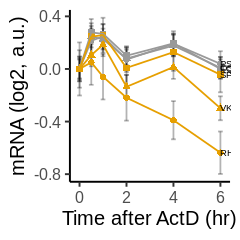

In [7]:
options(repr.plot.width=2, repr.plot.height=2)

plot_data <- lfc_data %>% filter(pair <= 3) %>% print 

plot_data %>% 
  ggplot(aes(x = time, y = statistic, 
             ymin = statistic - std.error, ymax = statistic + std.error,
             color = insert_type, group = insert_name, shape = as.factor(pair))) +
  geom_errorbar(width = 0.2, color = "black", alpha = 0.3) +
  geom_point(width=0.5, size=1.5) +
  geom_line() +
  scale_color_manual(values = cbPalette) +
  theme(legend.position = "none") +
  geom_text(aes(x = time, y = statistic, label = insert_name), 
            data = plot_data %>% filter(time == 6),
            color = "black", size = 2, hjust = 0) +
  labs(x = "Time after ActD (hr)", y = "mRNA (log2, a.u.)")

### Calculate bootstrap p-values for difference between stall and corresponding control at each time point

- Something is odd with this step. 

- It's nearly working, but seems the comparisons aren't quite being drawn appropriately (or at all) 

In [8]:
lfc_data %>%
  select(-statistic, -bias, -std.error, -insert_seq, -frame, -insert_num) %>%
  # Remove SVKF for now, since we don't have it's corresponding control
  filter(!str_detect(insert_name, "SVKF")) %>% 
  group_by(pair, time) %>%
  mutate(insert_name = insert_name[insert_type == "stall"]) %>% 
  pivot_wider(names_from = insert_type, values_from = lfc) %>% 
  unnest(control, stall) %>% 
  group_by(pair) %>% 
  mutate(control = control - mean(control[time == 0])) %>% 
  mutate(stall = stall - mean(stall[time == 0])) %>% 
  mutate(effect = if_else(stall > control, T, F)) %>% 
  group_by(sample_name, time, insert_name, pair) %>% 
  summarize(p = sum(effect) / dplyr::n()) %>% 
  ungroup() %>% print 

Warning message:
“unnest() has a new interface. See ?unnest for details.
Try `df %>% unnest(c(control, stall))`, with `mutate()` if needed”
`summarise()` has grouped output by 'sample_name', 'time', 'insert_name'. You can override using the `.groups` argument.


# A tibble: 18 × 5
   sample_name  time insert_name  pair      p
   <chr>       <dbl> <chr>       <dbl>  <dbl>
 1 t0            0   RH8             1 0.498 
 2 t0            0   SF8             3 0.502 
 3 t0            0   VK8             2 0.505 
 4 t0.5          0.5 RH8             1 0.194 
 5 t0.5          0.5 SF8             3 0.411 
 6 t0.5          0.5 VK8             2 0.123 
 7 t1            1   RH8             1 0.0638
 8 t1            1   SF8             3 0.481 
 9 t1            1   VK8             2 0.369 
10 t2            2   RH8             1 0.0642
11 t2            2   SF8             3 0.279 
12 t2            2   VK8             2 0.0372
13 t4            4   RH8             1 0.0012
14 t4            4   SF8             3 0.334 
15 t4            4   VK8             2 0.0852
16 t6            6   RH8             1 0     
17 t6            6   SF8             3 0.384 
18 t6            6   VK8             2 0.0088
